<a href="https://colab.research.google.com/github/AbhiSri-08/MachineLearning/blob/main/Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read File**

In [10]:
sal_data=pd.read_csv("/content/Dataset09-Employee-salary-prediction.csv")
sal_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


**Number** of Rows and Columns

In [11]:
sal_data.shape

(375, 6)

**List** of Columns

In [12]:
sal_data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

Rename Columns

In [13]:
sal_data.columns=['Age','Gender','Degree','Job_Title','Experience_years','Salary']
sal_data.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


Column datatypes

In [14]:
sal_data.dtypes

,0
Age,float64
Gender,object
Degree,object
Job_Title,object
Experience_years,float64
Salary,float64


Information of Dataset

In [15]:
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               373 non-null    float64
 1   Gender            373 non-null    object 
 2   Degree            373 non-null    object 
 3   Job_Title         373 non-null    object 
 4   Experience_years  373 non-null    float64
 5   Salary            373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


Duplicate Records in data

In [16]:
sal_data[sal_data.duplicated()]

,Age,Gender,Degree,Job_Title,Experience_years,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


In [17]:
sal_data[sal_data.duplicated()].shape

(50, 6)

Dropping duplicates

In [18]:
sal_data1=sal_data.drop_duplicates(keep='first')
sal_data1.shape

(325, 6)

Null values in each column

In [19]:
sal_data1.isnull().sum()

,0
Age,1
Gender,1
Degree,1
Job_Title,1
Experience_years,1
Salary,1


drop missing values from data

In [20]:
sal_data1.dropna(how="any",inplace=True)

<ipython-input-20-edfd128f58df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1.dropna(how="any",inplace=True)


In [21]:
sal_data1.shape

(324, 6)

Data Exploration

statistics of numerical columns

In [22]:
sal_data1.describe()

,Age,Experience_years,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [23]:
corr=sal_data1[['Age','Experience_years','Salary']].corr()
corr

,Age,Experience_years,Salary
Age,1.000000,0.979192,0.916543
Experience_years,0.979192,1.000000,0.924455
Salary,0.916543,0.924455,1.000000


<Axes: >

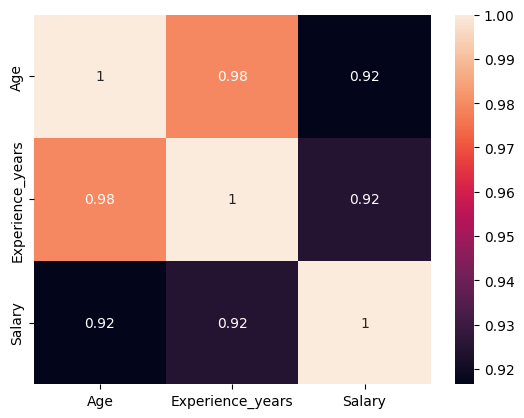

In [24]:
sns.heatmap(corr,annot=True)

Data Visualization

<Axes: xlabel='Degree'>

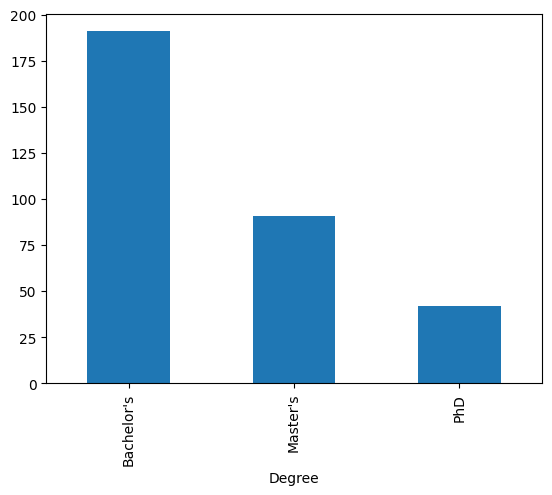

In [25]:
sal_data1['Degree'].value_counts().plot(kind="bar")

In [26]:
sal_data1['Job_Title'].value_counts()

,count
Job_Title,
Director of Operations,9
Director of Marketing,8
Senior Marketing Manager,8
Senior Project Manager,7
Senior Business Analyst,6
...,...
Business Development Manager,1
Customer Service Representative,1
IT Manager,1


In [27]:
sal_data1['Job_Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

<Axes: xlabel='Gender'>

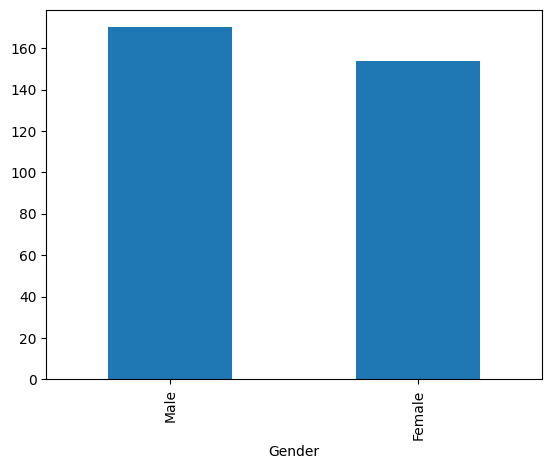

In [28]:
sal_data1['Gender'].value_counts().plot(kind="bar")

<Axes: ylabel='Frequency'>

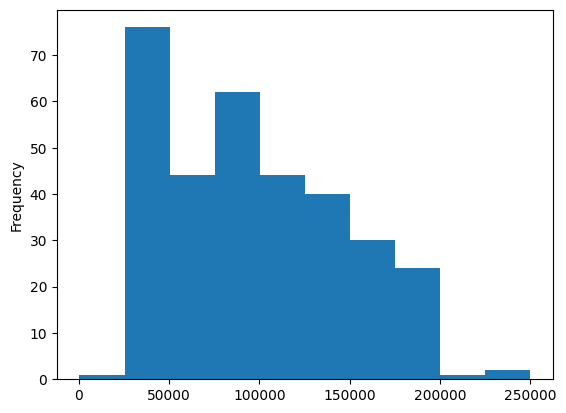

In [29]:
sal_data1.Salary.plot(kind="hist")

feature Engineering(conevrt text to numbers bcz algorithm doesn't understand text)

Label encoding

In [30]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()

In [31]:
sal_data1['Gender_Encode']=LabelEncoder.fit_transform(sal_data1['Gender'])
sal_data1['Degree_Encode']=LabelEncoder.fit_transform(sal_data1['Degree'])
sal_data1['Job_Title_Encode']=LabelEncoder.fit_transform(sal_data1['Job_Title'])

<ipython-input-31-9379cf8ef104>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Gender_Encode']=LabelEncoder.fit_transform(sal_data1['Gender'])
<ipython-input-31-9379cf8ef104>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Degree_Encode']=LabelEncoder.fit_transform(sal_data1['Degree'])
<ipython-input-31-9379cf8ef104>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Data after label encoding

In [32]:
sal_data1.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22


Feature scalling(-1 to 1)

In [33]:
from sklearn.preprocessing import StandardScaler
std_scalar=StandardScaler()

In [34]:
sal_data1['Age_scaled']=std_scalar.fit_transform(sal_data1[['Age']])
sal_data1['Experience_years_scaled']=std_scalar.fit_transform(sal_data1[['Experience_years']])

<ipython-input-34-ad8a61309696>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Age_scaled']=std_scalar.fit_transform(sal_data1[['Age']])
<ipython-input-34-ad8a61309696>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Experience_years_scaled']=std_scalar.fit_transform(sal_data1[['Experience_years']])


In [35]:
sal_data1.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode,Age_scaled,Experience_years_scaled
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159,-0.750231,-0.761821
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17,-1.307742,-1.063017
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130,1.061680,0.744158
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101,-0.192720,-0.460625
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22,2.037324,1.497148


Dependent and Independent Features

In [36]:
x=sal_data1[['Age_scaled','Gender_Encode','Degree_Encode','Job_Title_Encode','Experience_years_scaled']]
y=sal_data1['Salary']

In [37]:
x.head()

,Age_scaled,Gender_Encode,Degree_Encode,Job_Title_Encode,Experience_years_scaled
0,-0.750231,1,0,159,-0.761821
1,-1.307742,0,1,17,-1.063017
2,1.061680,1,2,130,0.744158
3,-0.192720,0,0,101,-0.460625
4,2.037324,1,1,22,1.497148


Splitting the data into Training and Testing

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
x_train.shape,y_train.shape #80% data

((259, 5), (259,))

In [41]:
x_test.shape,y_test.shape

((65, 5), (65,))

Model Development

In [42]:
from sklearn.linear_model import LinearRegression
linear_regression_model=LinearRegression()

Model training

In [43]:
linear_regression_model.fit(x_train,y_train)

LinearRegression()

Model prediction

In [44]:
y_pred=linear_regression_model.predict(x_test)
y_pred

array([117415.91344602, 125562.80742758,  48965.15386167, 128739.34887988,
       106828.49930535,  99654.76748821,  49101.27883652,  57130.71108104,
       166333.69009266,  43112.61060113,  40544.18249367, 122553.217185  ,
       107631.15450848, 155580.48335296,  83652.23602446, 170890.28450907,
        98984.50106226, 109338.33008328,  42267.86835535,  48089.87647812,
        75674.93528581,  64499.29874156,  63619.2494321 ,  31543.41552147,
       188376.92844437,  90340.76921722, 155285.91529198, 160863.57809872,
       185183.73163709,  34741.26224478, 124850.6230462 , 165106.94121635,
        87085.00622186, 155425.69514031, 149190.25441885,  45729.74800187,
        88475.39474629,  92025.62668073,  97997.32557607,  40411.112659  ,
        89995.79796521,  53873.21977084, 108677.48549927,  54590.96778663,
        36497.92729223,  48611.85493217, 129193.72126941,  43102.58902589,
       162383.16672117,  81874.95829259, 157771.0301154 ,  43984.89040816,
        59950.21740617,  

In [45]:
df=pd.DataFrame({'y_Actual':y_test,'y_predicted':y_pred})
df['Error']=df['y_Actual']-df['y_predicted']
df['abs_error']=abs(df['Error'])
df

,y_Actual,y_predicted,Error,abs_error
132,100000.0,117415.913446,-17415.913446,17415.913446
108,100000.0,125562.807428,-25562.807428,25562.807428
137,50000.0,48965.153862,1034.846138,1034.846138
9,110000.0,128739.348880,-18739.348880,18739.348880
181,105000.0,106828.499305,-1828.499305,1828.499305
...,...,...,...,...
104,80000.0,117279.788471,-37279.788471,37279.788471
233,85000.0,83396.821876,1603.178124,1603.178124
60,170000.0,177743.761029,-7743.761029,7743.761029
94,75000.0,72275.144274,2724.855726,2724.855726


In [46]:
Mean_absolute_error=df['abs_error'].mean()
Mean_absolute_error

10570.78640113617

Model Evaluation

In [47]:
from sklearn.metrics import accuracy_score,r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

Model Accuracy

In [48]:
r2_score(y_test,y_pred)

0.8911231066517089

In [49]:
print(f'Accuracy of the model={round(r2_score(y_test,y_pred),4)*100}%')

Accuracy of the model=89.11%


Mean absolute Error

In [50]:
round(mean_absolute_error(y_test,y_pred),2)
print(f'Mean Absolute Error={round(mean_absolute_error(y_test,y_pred),2)}')

Mean Absolute Error=10570.79


Mean Squared error

In [52]:
mse=round(mean_squared_error(y_test,y_pred),2)
mse

205754135.72

In [53]:
print('Root Mean Squared Error = ',mse**(0.5))

Root Mean Squared Error =  14344.132449193294


coefficients

In [54]:
linear_regression_model.coef_

array([2.01818940e+04, 7.38907834e+03, 1.54227359e+04, 1.95769562e+01,
       1.92043082e+04])

Intercept

In [55]:
linear_regression_model.intercept_

86001.49320553159

**Prediction**

In [56]:
Age1=std_scalar.transform([[49]])
Age=5.8644
Gender=0
Degree=2
Job_Title=22
Experience_years1=std_scalar.transform([[15]])
Experience_years=0.7444

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [57]:
std_scalar.transform([[15]])[0][0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0.7441581452572275

In [60]:
Emp_salary=linear_regression_model.predict([[Age,Gender,Degree,Job_Title,Experience_years]])
Emp_salary

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([249928.04399628])

In [64]:
print("Salary of that employee with above attributes = ",Emp_salary[0])

Salary of that employee with above attributes =  249928.04399628335
